In [5]:
##作业7-logistics回归

import matplotlib as plt 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Heiti TC'#mac显示中文
### 读取数据
import pandas as pd
# 已在原数据集做一修改，将所有label列“<=50K”的转换为0，“>50K”转换为1
df = pd.read_csv('/Users/xiedanning/Desktop/链家陕西房价处理后.csv')
df['label'] = df['关注度'].apply(lambda x: 0 if x == 0 else 1)


   户型      面积     单价  label
0   5  148.79   9712      1
1   5  138.93   4751      0
2   3   62.58  14063      0
3   1  128.63  17881      0
4   1  108.05  12217      1
    预测值  实际值
0     0    0
1     0    0
2     0    1
3     0    1
4     0    1
5     1    1
6     0    0
7     1    1
8     0    1
9     0    0
10    1    1
11    0    0
12    1    1
13    0    0
14    0    1
15    0    0
16    1    1
17    0    1
18    0    0
19    0    0
0.6502525252525253
分类准确率为: 65.025253%
   工资小于50K概率  工资大于50K概率
0   0.609810   0.390190
1   0.544346   0.455654
2   0.693546   0.306454
3   0.584988   0.415012
4   0.574987   0.425013
[[ 1.90104687e-02 -3.04581580e-03  8.81534454e-05]]
[-0.95167584]
           0（预测无关注度）  1（预测有关注度）
0（实际无关注度）       1339        103
1（实际有关注度）        728        206
              precision    recall  f1-score   support

           0       0.65      0.93      0.76      1442
           1       0.67      0.22      0.33       934

    accuracy                           0.65      23

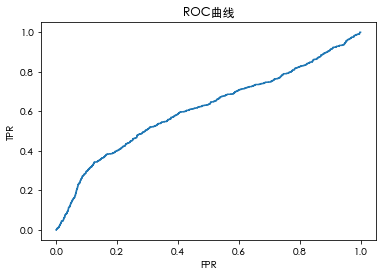

AUC score is 0.611947
AUC score is 0.611947


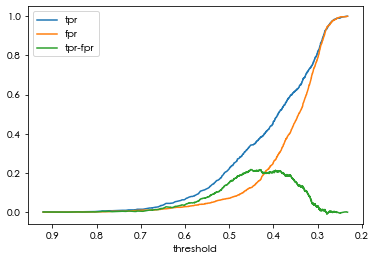

           阈值      假警报率       命中率   TPR-FPR
254  0.451458  0.124827  0.342612  0.217786
       分类为0的概率   分类为1的概率
2167  0.079254  0.920746
2119  0.134495  0.865505
35    0.158828  0.841172
2247  0.167713  0.832287
806   0.194108  0.805892
1359  0.195874  0.804126
2028  0.210341  0.789659
1881  0.210341  0.789659
1904  0.212313  0.787687
575   0.219489  0.780511
2297  0.228514  0.771486
235   0.232693  0.767307
2228  0.235057  0.764943
1713  0.235116  0.764884
2226  0.241224  0.758776


In [6]:
### 选取部分维度进行回归
# 经过增删数值型变量，发现删除'fnlwgt'后ROC曲线较好
df = df[['户型', '面积', '单价','label']]
print(df.head())
#将label设为因变量，其他的是自变量
X = df.drop(columns='label') 
y = df['label']   

### 划分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### 模型搭建
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

### 模型使用1 - 预测数据结果
y_pred = model.predict(X_test)
a = pd.DataFrame()
a['预测值'] = list(y_pred)
a['实际值'] = list(y_test)
print(a.head(20))

# 查看分类准确率
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print(score)

print('分类准确率为: %f%%' % (model.score(X_test, y_test) * 100))

### 模型使用2 - 预测概率
y_pred_proba = model.predict_proba(X_test)  
a = pd.DataFrame(y_pred_proba, columns=['工资小于50K概率', '工资大于50K概率'])
print(a.head())

### 查看各个特征变量的系数
print(model.coef_)
print(model.intercept_)

### 计算混淆矩阵
from sklearn.metrics import confusion_matrix
m = confusion_matrix(y_test, y_pred)
a = pd.DataFrame(m, index=['0（实际无关注度）', '1（实际有关注度）'],
                 columns=['0（预测无关注度）', '1（预测有关注度）'])
print(a)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

### 绘制ROC曲线
from sklearn.metrics import roc_curve
#y_test = y_test - 1
fpr, tpr, thres = roc_curve(y_test, y_pred_proba[:, 1])
a = pd.DataFrame()
a['阈值'] = thres
a['假警报率'] = fpr
a['命中率'] = tpr
print(a.head())
print(a.tail())

import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.title('ROC曲线')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### 计算AUC
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, y_pred_proba[:,1])
print('AUC score is %f' % score)
### 或者用auc来计算
from sklearn.metrics import auc
score1 = auc(fpr, tpr)
print('AUC score is %f' % score1)

### 绘制KS曲线并求KS值
plt.plot(thres[1:], tpr[1:])
plt.plot(thres[1:], fpr[1:])
plt.plot(thres[1:], tpr[1:] - fpr[1:])
plt.xlabel('threshold')
plt.legend(['tpr', 'fpr', 'tpr-fpr'])
plt.gca().invert_xaxis()
plt.show()

a['TPR-FPR'] = tpr - fpr
print(a[a['TPR-FPR'] == max(a['TPR-FPR'])])



# ROC曲线中阈值来源
b = pd.DataFrame(y_pred_proba, columns=['分类为0的概率','分类为1的概率'])
b = b.sort_values(by='分类为1的概率', ascending=False)
print(b.head(15))




